AI project 
16/01/2023

Recommendation Systems
by Veronica Boni, Gabriel Stanziola and Omar Lezar

-EDA

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

The first thing we want to do is to load our csv files and visualize them

In [4]:
articles= pd.read_csv("recsys (3)/recsys_articles.csv")
articles

,article_id,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,perceived_colour_master_name,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
0,0,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
1,1,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
2,2,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
3,3,200 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
4,4,Control Top 50 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,6531,Virgo sweater fast buy,252,Sweater,Garment Upper body,9,Black,4,Dark,5,Black,1640,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy
6532,6532,Virgo sweater fast buy,252,Sweater,Garment Upper body,52,Pink,1,Dusty Light,4,Pink,1640,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy
6533,6533,Heavy plain overknee tights 1p,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
6534,6534,SPORT Malaga tank,253,Vest top,Garment Upper body,9,Black,4,Dark,5,Black,1919,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy


In [5]:
customers= pd.read_csv('recsys (3)/recsys_customers.csv')
customers

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
2,2,0,0,29.0
3,3,0,0,21.0
4,4,0,0,23.0
...,...,...,...,...
41248,41248,1,1,33.0
41249,41249,0,0,25.0
41250,41250,1,1,20.0
41251,41251,1,1,29.0


In [6]:
transactions= pd.read_csv('recsys (3)/recsys_transactions.csv')
transactions

,t_dat,customer_id,article_id
0,2020-09-02,7,599
1,2020-09-02,7,2600
2,2020-09-02,7,2063
3,2020-09-02,7,5188
4,2020-09-02,17,5111
...,...,...,...
369108,2020-09-22,41231,3300
369109,2020-09-22,41242,6325
369110,2020-09-22,41242,4643
369111,2020-09-22,41244,2840


from this first analysis we can already check the size of our files:

the articles file is composed by 6536 rows × 21 columns;
the customers file is composed by 41253 rows × 4 columns;
the transactions file is composed by 369113 rows × 3 columns;


so now we want to analyze the data types of our columns and to check if there are Null values. 


In [7]:
articles.dtypes

article_id                       int64
prod_name                       object
product_type                     int64
product_type_name               object
product_group_name              object
colour_group                     int64
colour_group_name               object
perceived_colour_value           int64
perceived_colour_value_name     object
perceived_colour_master          int64
perceived_colour_master_name    object
department                       int64
department_name                 object
index                           object
index_name                      object
index_group                      int64
index_group_name                object
section                          int64
section_name                    object
garment_group                    int64
garment_group_name              object
dtype: object

In [8]:
pd.isna(articles).sum()

article_id                      0
prod_name                       0
product_type                    0
product_type_name               0
product_group_name              0
colour_group                    0
colour_group_name               0
perceived_colour_value          0
perceived_colour_value_name     0
perceived_colour_master         0
perceived_colour_master_name    0
department                      0
department_name                 0
index                           0
index_name                      0
index_group                     0
index_group_name                0
section                         0
section_name                    0
garment_group                   0
garment_group_name              0
dtype: int64

In [9]:
customers.dtypes

customer_id       int64
fashion_news      int64
club_member       int64
age             float64
dtype: object

In [10]:
pd.isna(customers).sum()

customer_id       0
fashion_news      0
club_member       0
age             133
dtype: int64

In [11]:
transactions.dtypes

t_dat          object
customer_id     int64
article_id      int64
dtype: object

In [12]:
pd.isna(transactions).sum()

t_dat          0
customer_id    0
article_id     0
dtype: int64

there are 133 null values in the customers file in the 'age' column that we want to remove those rows in which we cannot have the age of the customer

In [13]:
customers.dropna()

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
2,2,0,0,29.0
3,3,0,0,21.0
4,4,0,0,23.0
...,...,...,...,...
41248,41248,1,1,33.0
41249,41249,0,0,25.0
41250,41250,1,1,20.0
41251,41251,1,1,29.0


Before moving on to the actual recommender systems we want to analyze our data and find out more about the articles in the store, the customers behaviour etc...

We first start with the analysis of the first csv file: 

We want to analyze the distribution of our data and plot it. 

We took some of the columns of our dataset, in particular we wanted to work with those with a string data type since it would be more human friendly to use the actual names instead of the code. 


In the next line of code we are going to analyze the departments distribution.

We can see that the jersey's deparment is the biggest one you can find in the store, followed by Knitwear and the Trousers' ones.
In the graph below there is the distribution of all the deparments.

There are some departments composed only by 1 item. 

Jersey                    400
Knitwear                  339
Trouser                   335
Blouse                    307
Basic 1                   262
                         ... 
Kids Girl Jersey Basic      1
Men Sport Bottoms           1
Kids Girl Denim             1
Kids Boy Jersey Basic       1
Underwear Woven             1
Name: department_name, Length: 144, dtype: int64

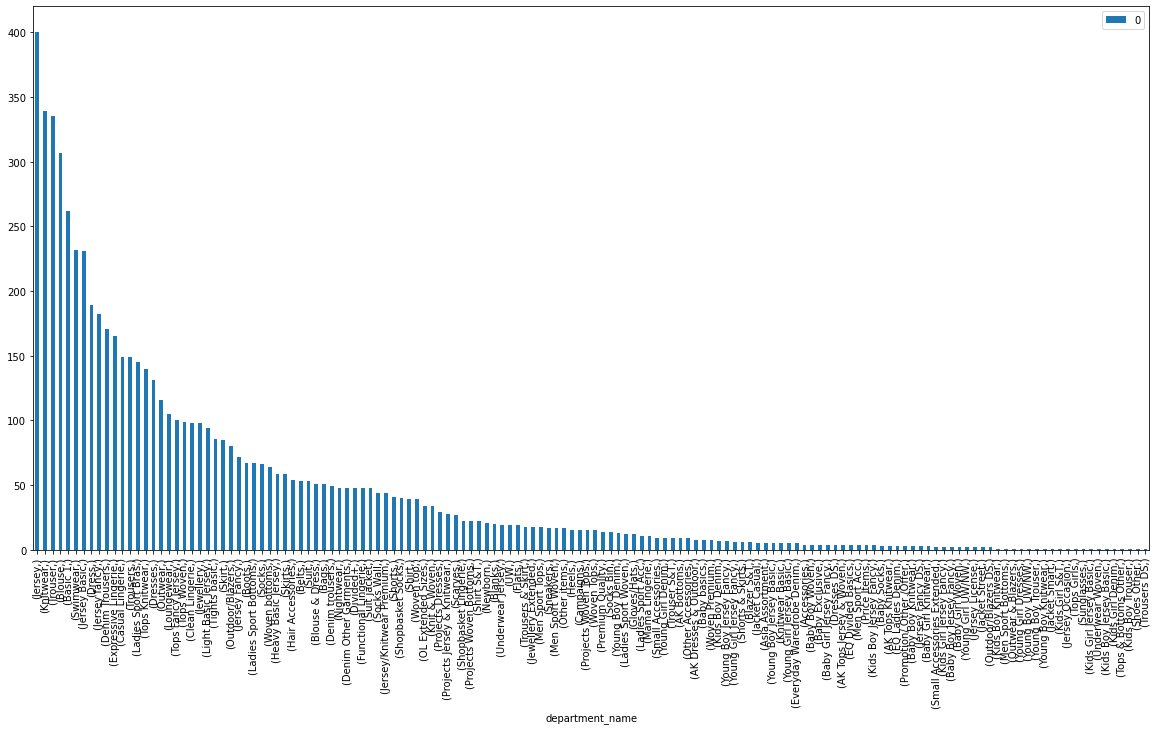

In [14]:
pd.DataFrame(articles[["department_name"]].value_counts()).plot(kind='bar', figsize=(20,10))
articles['department_name'].value_counts()

Then we are going to do the same analysis for the product group:

The biggest group is the Garment Upper body, this means that we are going to find lots of these articles in the store. 

product_group_name
Garment Upper body    2799
Garment Lower body    1428
Garment Full body      632
Underwear              547
Accessories            378
Socks & Tights         245
Swimwear               233
Shoes                  135
Unknown                 67
Nightwear               60
Items                   10
Bags                     2
dtype: int64

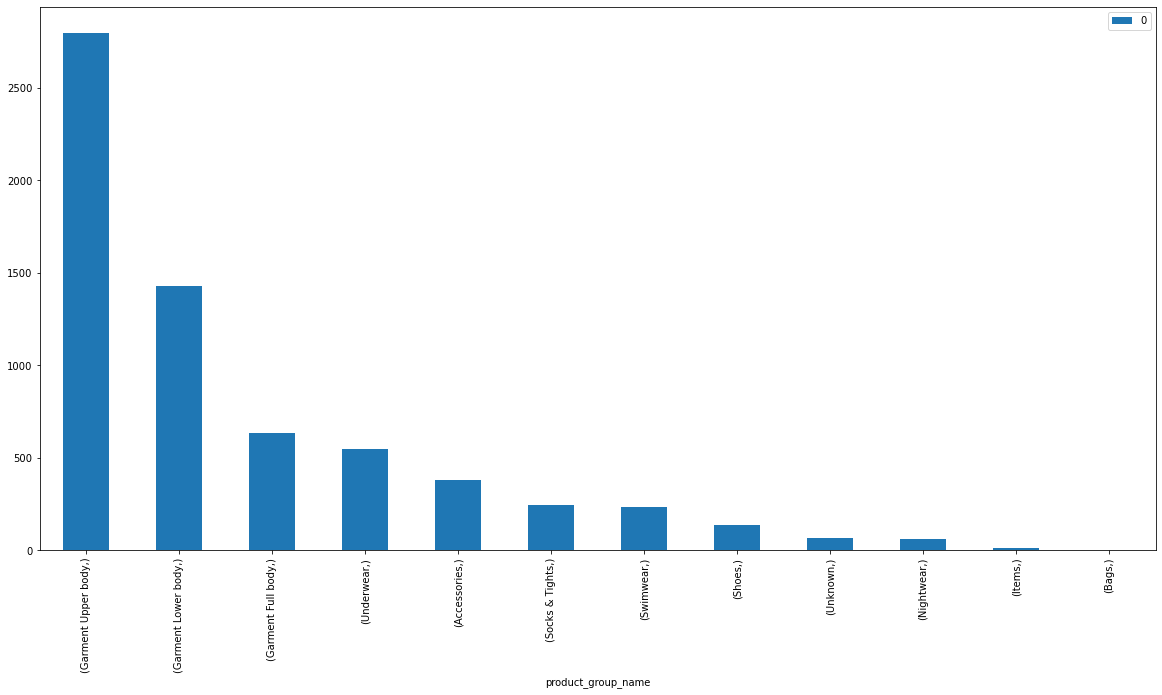

In [15]:
pd.DataFrame(articles[["product_group_name"]].value_counts()).plot(kind='bar', figsize=(20,10))
articles[["product_group_name"]].value_counts()

The next is the colour group, we choose to analyze this very one even though we have some information regarding the perceived coulour group since we found it redoundant for our analysis and we thought it could be enough to analyze the actual colour which in fact has more elements, could give us a better accuracy.

The colours more popular in the store are Black, White, Dark Blue and some nude tones. 

colour_group_name
Black                2121
White                 605
Dark Blue             332
Beige                 322
Light Beige           307
Grey                  235
Blue                  227
Light Pink            211
Dark Grey             208
Off White             191
Greenish Khaki        162
Light Blue            160
Dark Green            133
Pink                  115
Yellowish Brown       111
Light Grey            106
Light Orange           94
Gold                   90
Dark Beige             86
Dark Red               85
Green                  61
Orange                 57
Light Purple           55
Dark Pink              47
Dark Orange            47
Yellow                 42
Greyish Beige          40
Red                    37
Dark Purple            30
Purple                 28
Light Turquoise        27
Silver                 26
Light Yellow           25
Light Green            23
Turquoise              19
Dark Turquoise         18
Dark Yellow            16
Other Pink          

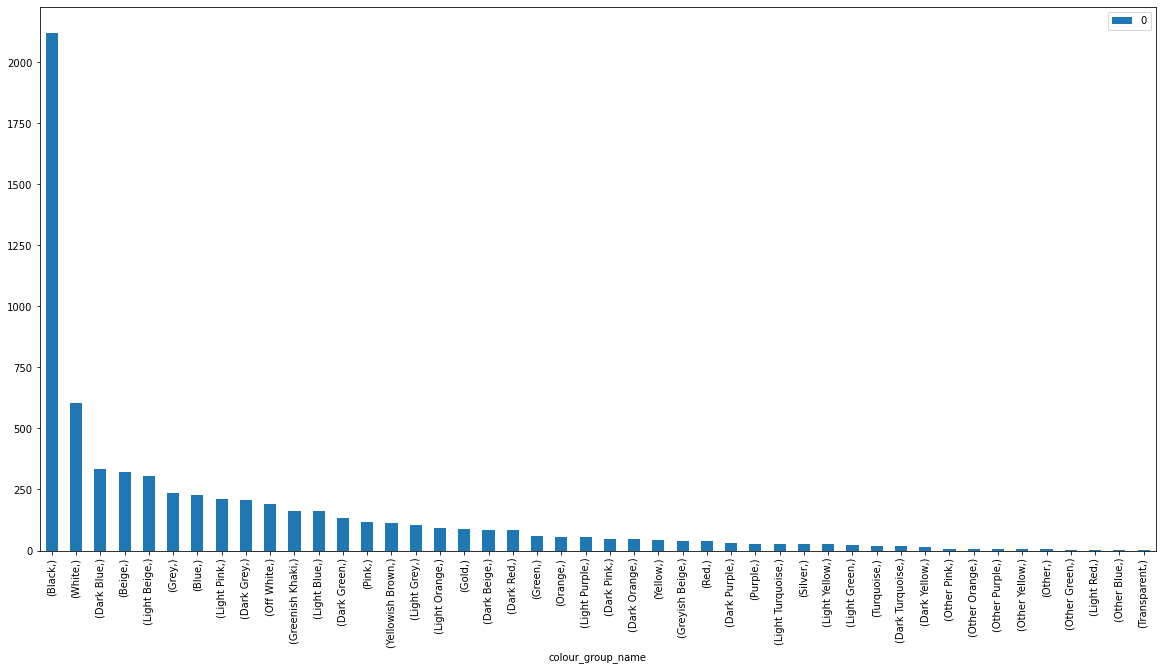

In [16]:
pd.DataFrame(articles[["colour_group_name"]].value_counts()).plot(kind='bar', figsize=(20,10))
articles[["colour_group_name"]].value_counts()

In the store we can find mainly Ladieswear 

index_name            
Ladieswear                2615
Divided                   1534
Lingeries/Tights           964
Menswear                   579
Ladies Accessories         444
Sport                      276
Baby Sizes 50-98            54
Children Sizes 134-170      51
Children Sizes 92-140       19
dtype: int64

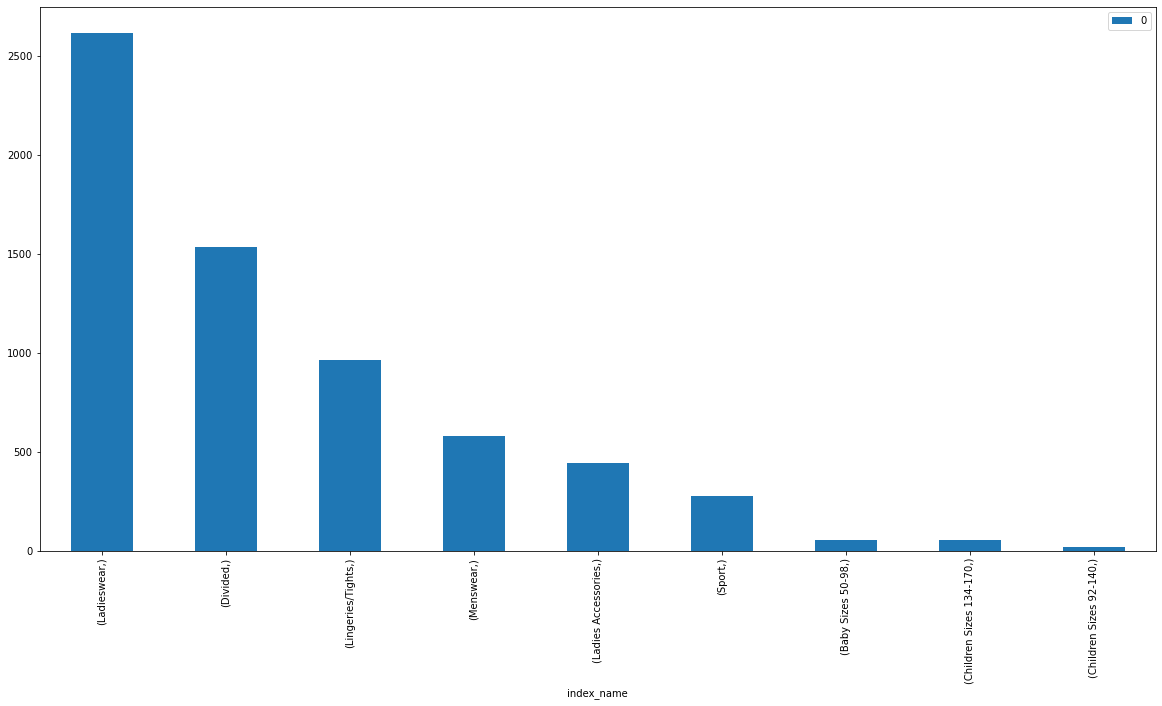

In [17]:
pd.DataFrame(articles[["index_name"]].value_counts()).plot(kind='bar', figsize=(20,10))
articles[["index_name"]].value_counts()

In the next two analysis we can see more in detail what are the sections of the store are more present.

section_name                  
Womens Everyday Collection        881
Divided Collection                772
Womens Tailoring                  519
Womens Lingerie                   493
Womens Nightwear, Socks & Tigh    342
Divided Basics                    286
Men Underwear                     257
Ladies Denim                      253
Ladies H&M Sport                  235
Womens Everyday Basics            234
Womens Swimwear, beachwear        231
Womens Casual                     218
Womens Small accessories          190
H&M+                              185
Womens Trend                      151
Divided Projects                  149
Womens Shoes                      132
Mama                              131
Womens Big accessories            122
Womens Jackets                    107
Contemporary Smart                103
Divided Accessories                65
Womens Premium                     53
Contemporary Casual                52
Men Suits & Tailoring              50
Denim Men          

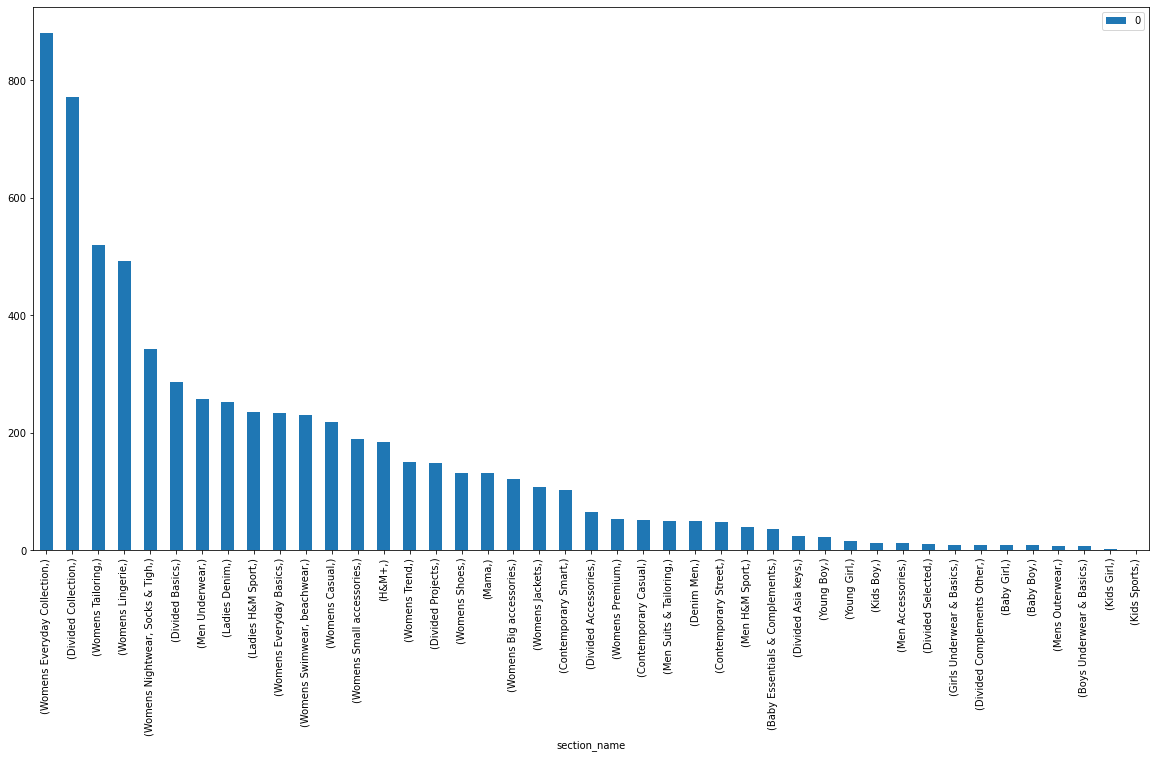

In [18]:
pd.DataFrame(articles[["section_name"]].value_counts()).plot(kind='bar', figsize=(20,10))
articles[["section_name"]].value_counts()

garment_group_name           
Jersey Fancy                     1067
Jersey Basic                      696
Under-, Nightwear                 688
Trousers                          609
Knitwear                          539
Blouses                           526
Accessories                       404
Dresses Ladies                    362
Trousers Denim                    335
Socks and Tights                  254
Swimwear                          232
Outdoor                           224
Skirts                            144
Shoes                             133
Dressed                           108
Unknown                            78
Shirts                             61
Shorts                             47
Special Offers                     18
Woven/Jersey/Knitted mix Baby      10
Dresses/Skirts girls                1
dtype: int64

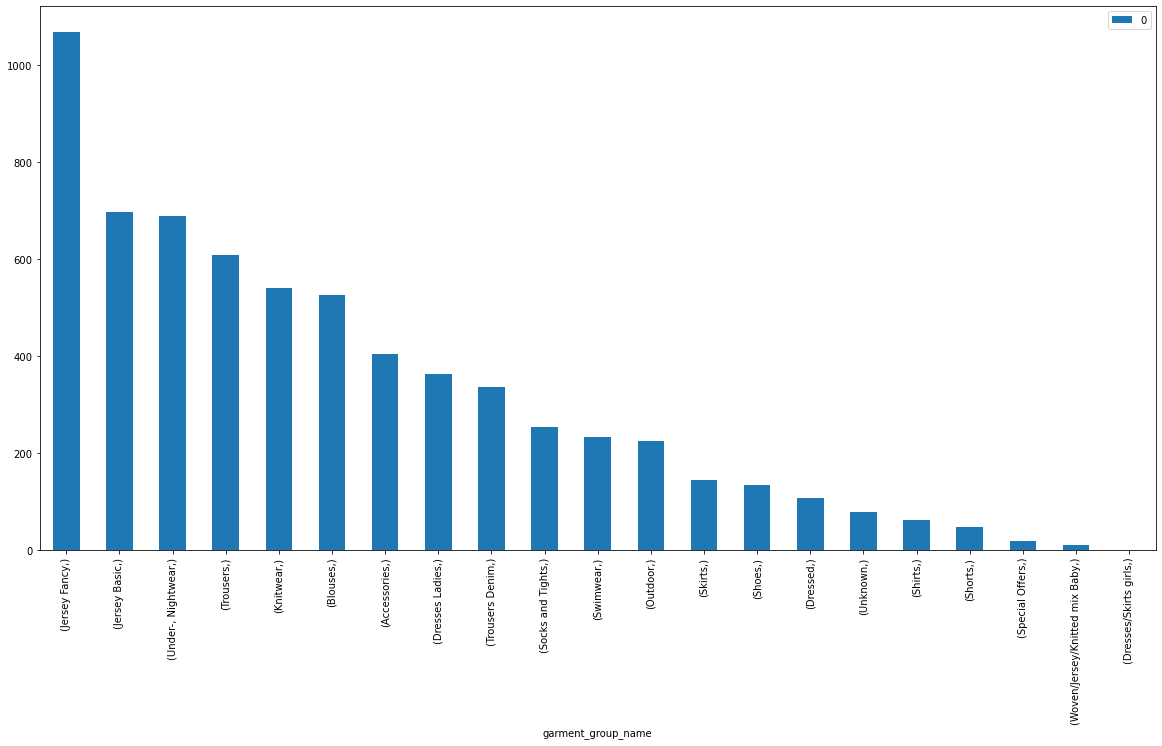

In [19]:
pd.DataFrame(articles[["garment_group_name"]].value_counts()).plot(kind='bar', figsize=(20,10))
articles[["garment_group_name"]].value_counts()

By studying these columns we can also understand what kind of customers we have in the store. For instance we would expect to find more women buying than men. 

Next we move on to the analysis of our customers dataset

From this file we could get two kind of information regarding the customer, its interest in fashion and their age.

These two factors might be interesting for the clustering of the customers since it could be possible that clients with similar age might have the same taste and also we could forecast that people both interested in fashion could share some preferences

We divide our customers in 

In [20]:
interested= customers[customers['fashion_news']>0]
interested

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
5,5,1,1,32.0
7,7,1,1,42.0
8,8,1,1,25.0
...,...,...,...,...
41242,41242,1,1,32.0
41244,41244,1,1,21.0
41248,41248,1,1,33.0
41250,41250,1,1,20.0


In [21]:
members= customers[customers['club_member']>0]
members

,customer_id,fashion_news,club_member,age
0,0,1,1,44.0
1,1,1,1,33.0
5,5,1,1,32.0
7,7,1,1,42.0
8,8,1,1,25.0
...,...,...,...,...
41242,41242,1,1,32.0
41244,41244,1,1,21.0
41248,41248,1,1,33.0
41250,41250,1,1,20.0


<AxesSubplot:xlabel='age'>

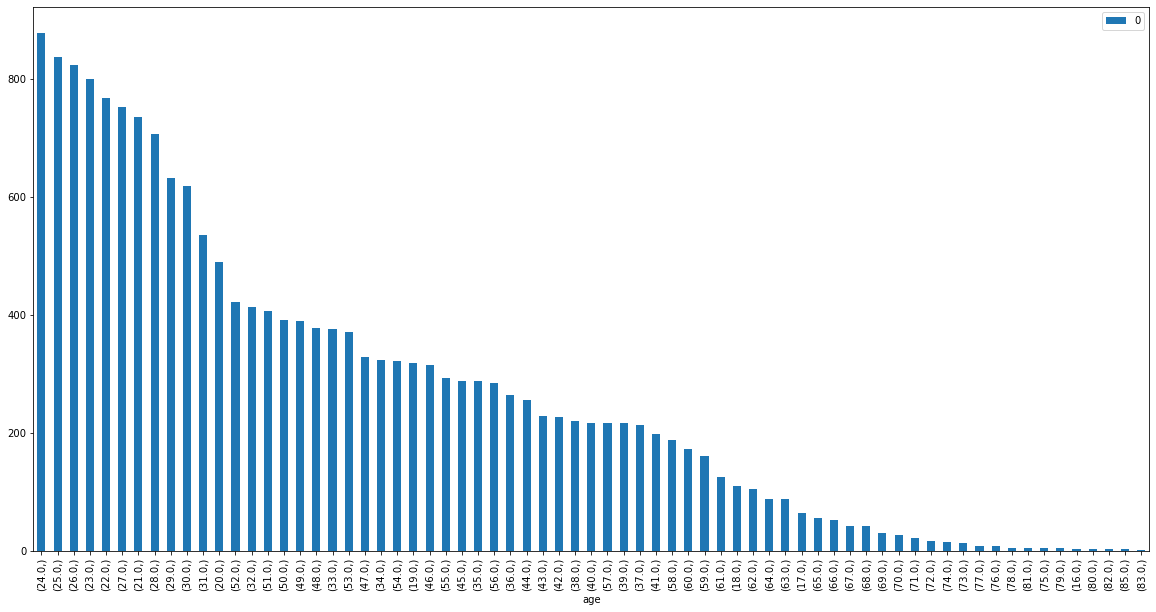

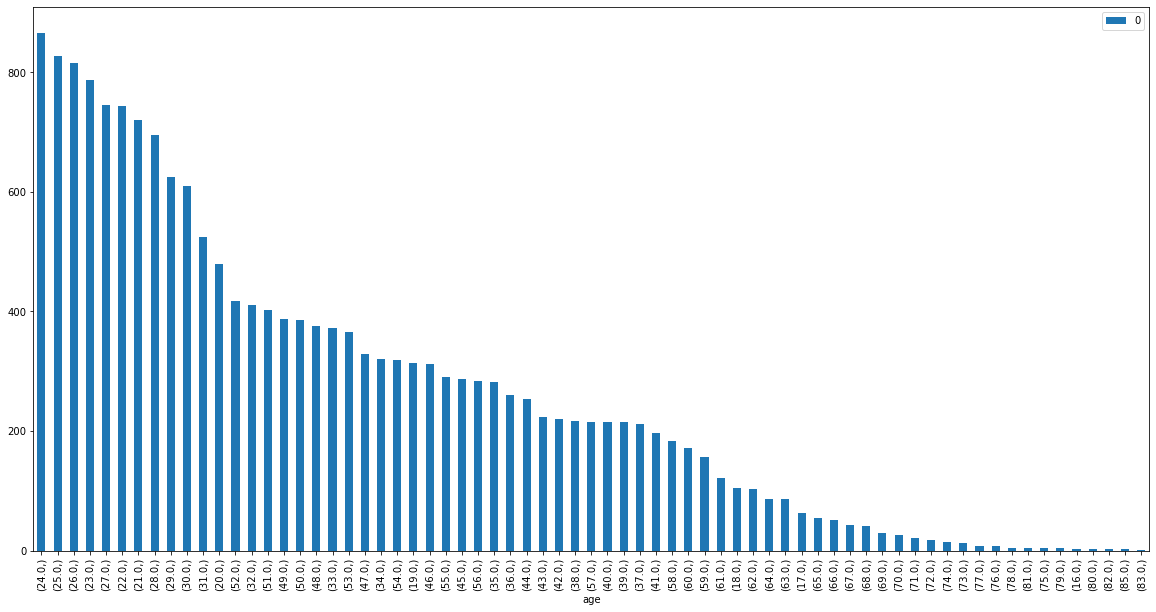

In [22]:
i= pd.DataFrame(interested[["age"]].value_counts())
i.plot.bar(figsize=(20,10))
m= pd.DataFrame(members[["age"]].value_counts())
m.plot.bar(figsize=(20,10))


we can see how there is no big difference between the age of those interested in fashion and those that are club members, in fact in general we can say that who is a club member is quite for sure interested in fashion news. 

We then move on to the transactions dataset, by first checking the number of transactions and of the customers, of course a customer might have purchased more than once, therefore it makes sense for the number of transactions to be higher than the number of customers, to be more precise, in fact we also analyzed how many times a single customer has bought something from the store. 

In [23]:
n_customers= transactions['customer_id'].nunique()
n_transactions= len(transactions)
print(f"Number of transactions: {n_transactions}")
print(f"Number of unique customers: {n_customers}")

Number of transactions: 369113
Number of unique customers: 41253


In [24]:
cust_freq = transactions[['customer_id', 'article_id']].groupby('customer_id').count().reset_index()
cust_freq.columns = ['customer_id', 'n_transactions']
cust_freq.head()

,customer_id,n_transactions
0,0,4
1,1,7
2,2,9
3,3,7
4,4,16


Then we thought it could be interesting to see which article is actually the most popular, and in the next lines we will analyze the top ten of the most sold articles in the store.

In [25]:
article_popularity= transactions[['customer_id', 'article_id']].groupby('article_id').count().reset_index()
article_popularity.columns = ['article_id', 'n_transactions']

article_popularity.sort_values('n_transactions', ascending=False)
article_popularity.head()

,article_id,n_transactions
0,0,61
1,1,109
2,2,113
3,3,28
4,4,155


In [26]:
article_popularity.set_index('n_transactions')
article_popularity
minimum = article_popularity['n_transactions'].min()
minimum
print('every customer has made at least ', minimum, ' transactions')
maximum = article_popularity['n_transactions'].max()
print('the highest number of transactions made by a single customer is equal to ',maximum)


every customer has made at least  11  transactions
the highest number of transactions made by a single customer is equal to  1045


In [27]:
article_popularity= article_popularity.merge(articles[['article_id','prod_name']])
article_popularity.head()

,article_id,n_transactions,prod_name
0,0,61,20 den 1p Stockings
1,1,109,Shape Up 30 den 1p Tights
2,2,113,Support 40 den 1p Tights
3,3,28,200 den 1p Tights
4,4,155,Control Top 50 den 1p Tights


In [28]:
topten= article_popularity.nlargest(10, 'n_transactions')
topten


,article_id,n_transactions,prod_name
1419,1419,1045,Pluto RW slacks (1)
168,168,896,Perrie Slim Mom Denim TRS
5831,5831,889,Liliana
6166,6166,858,Ohlsson
1429,1429,815,Pluto RW slacks (1)
3607,3607,809,Pink HW barrel
5548,5548,801,FF PI Haley dress
1006,1006,794,Jade HW Skinny Denim TRS
1599,1599,732,Lucy blouse
5929,5929,696,STRONG HW seamless tights


<AxesSubplot:xlabel='prod_name'>

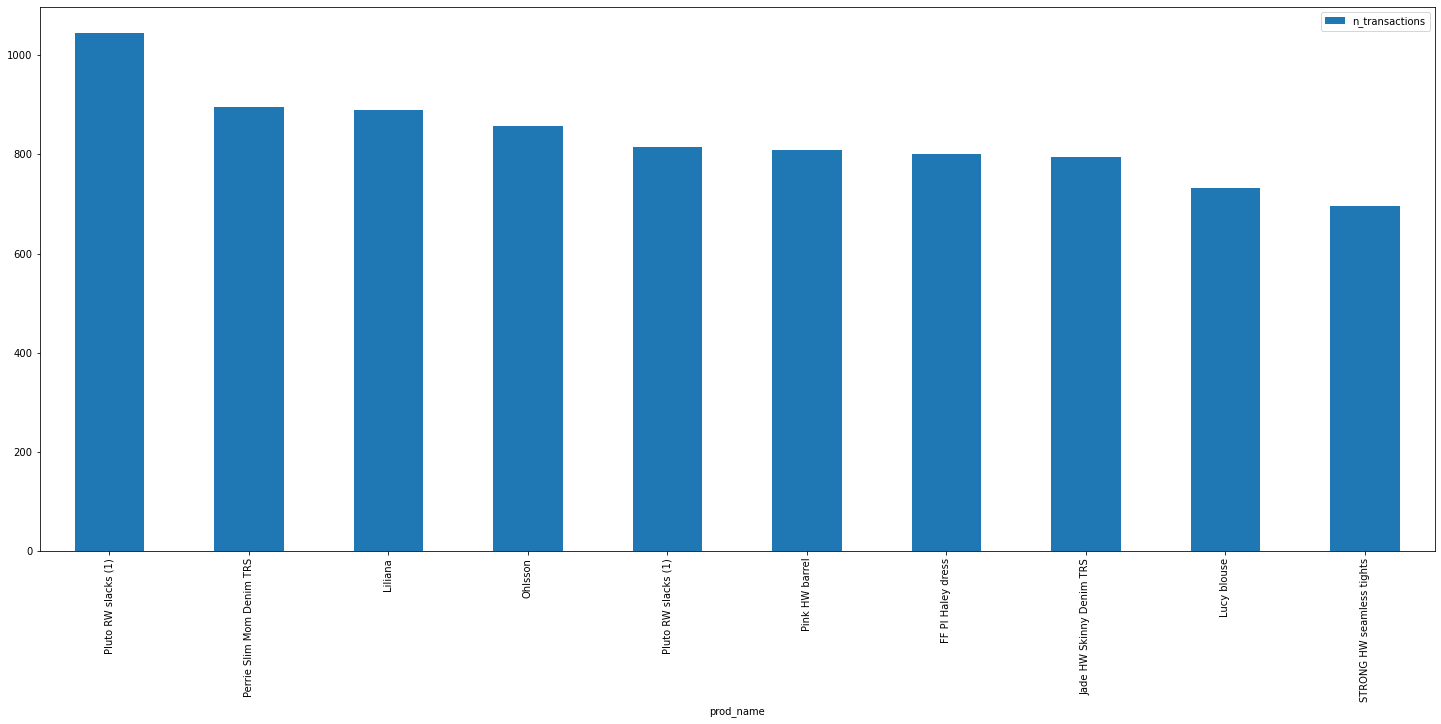

In [29]:
topten.plot(kind='bar', x= 'prod_name', y='n_transactions', figsize=(25,10))

-Content Filtering

We first set our 'article_id' as index, so that .....

In [30]:
articles.set_index('article_id')

,prod_name,product_type,product_type_name,product_group_name,colour_group,colour_group_name,perceived_colour_value,perceived_colour_value_name,perceived_colour_master,perceived_colour_master_name,department,department_name,index,index_name,index_group,index_group_name,section,section_name,garment_group,garment_group_name
article_id,,,,,,,,,,,,,,,,,,,,
0,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
1,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
2,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
3,200 den 1p Tights,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
4,Control Top 50 den 1p Tights,273,Leggings/Tights,Garment Lower body,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,Virgo sweater fast buy,252,Sweater,Garment Upper body,9,Black,4,Dark,5,Black,1640,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy
6532,Virgo sweater fast buy,252,Sweater,Garment Upper body,52,Pink,1,Dusty Light,4,Pink,1640,Tops Fancy Jersey,D,Divided,2,Divided,53,Divided Collection,1005,Jersey Fancy
6533,Heavy plain overknee tights 1p,304,Underwear Tights,Socks & Tights,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights


we create a new dataset with only the columns that we thought could give us the best features to then analyze each single article. We chose of course the id of the article, the name of the group by which the article is categorized, the color of the article, the department in the store in which we can find the article and then the garment name which give us some more details regarding what the object is. 

In [31]:
sim= articles[['article_id', 'product_group_name', 'colour_group_name', 'department_name', 'garment_group_name']]
sim

,article_id,product_group_name,colour_group_name,department_name,garment_group_name
0,0,Socks & Tights,Black,Tights basic,Socks and Tights
1,1,Garment Lower body,Black,Tights basic,Socks and Tights
2,2,Socks & Tights,Black,Tights basic,Socks and Tights
3,3,Socks & Tights,Black,Tights basic,Socks and Tights
4,4,Garment Lower body,Black,Tights basic,Socks and Tights
...,...,...,...,...,...
6531,6531,Garment Upper body,Black,Tops Fancy Jersey,Jersey Fancy
6532,6532,Garment Upper body,Pink,Tops Fancy Jersey,Jersey Fancy
6533,6533,Socks & Tights,Black,Tights basic,Socks and Tights
6534,6534,Garment Upper body,Black,Jersey,Jersey Fancy


since our data is Gategorical, by using the function .get_dummied() we can get our values under the form of 0s and 1s, we have done this step for all the 4 features we took into consideration

In [32]:
prod= pd.get_dummies(sim['product_group_name'])
prod

,Accessories,Bags,Garment Full body,Garment Lower body,Garment Upper body,Items,Nightwear,Shoes,Socks & Tights,Swimwear,Underwear,Unknown
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0,0,0,0,1,0,0,0,0,0,0,0
6532,0,0,0,0,1,0,0,0,0,0,0,0
6533,0,0,0,0,0,0,0,0,1,0,0,0
6534,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
colour = pd.get_dummies(sim['colour_group_name'])
colour

,Beige,Black,Blue,Dark Beige,Dark Blue,Dark Green,Dark Grey,Dark Orange,Dark Pink,Dark Purple,Dark Red,Dark Turquoise,Dark Yellow,Gold,Green,Greenish Khaki,Grey,Greyish Beige,Light Beige,Light Blue,Light Green,Light Grey,Light Orange,Light Pink,Light Purple,Light Red,Light Turquoise,Light Yellow,Off White,Orange,Other,Other Blue,Other Green,Other Orange,Other Pink,Other Purple,Other Yellow,Pink,Purple,Red,Silver,Transparent,Turquoise,White,Yellow,Yellowish Brown
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6533,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6534,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
dep= pd.get_dummies(sim['department_name'])
dep

,AK Bottoms,AK Dresses & Outdoor,AK Tops Jersey & Woven,AK Tops Knitwear,Accessories,Asia Assortment,Baby Boy Jersey Fancy,Baby Boy Knitwear,Baby Boy Woven,Baby Exclusive,Baby Girl Jersey Fancy,Baby Girl Knitwear,Baby Girl Woven,Baby Socks,Baby basics,Bags,Basic 1,Belts,Blanks,Blazer S&T,Blouse,Blouse & Dress,Boots,Campaigns,Casual Lingerie,Clean Lingerie,Denim Other Garments,Denim Trousers,Denim trousers,Divided+,Dress,Dresses,Dresses DS,EQ Divided Basics,EQ Ladies Denim,Everyday Waredrobe Denim,Expressive Lingerie,Flats,Functional Lingerie,Gloves/Hats,Hair Accessories,Heavy Basic Jersey,Heels,Jacket Casual,Jacket Smart,Jacket Street,Jersey,Jersey Basic,Jersey Fancy,Jersey Fancy DS,Jersey License,Jersey Occasion,Jersey fancy,Jersey/Knitwear Premium,Jewellery,Jewellery Extended,Kids Boy Denim,Kids Boy Jersey Basic,Kids Boy Jersey Fancy,Kids Boy Knitwear,Kids Boy Trouser,Kids Girl Denim,Kids Girl Jersey Basic,Kids Girl Jersey Fancy,Kids Girl S&T,Knit & Woven,Knitwear,Knitwear Basic,Ladies Sport Acc,Ladies Sport Bottoms,Ladies Sport Bras,Ladies Sport Woven,Light Basic Jersey,Loungewear,Mama Lingerie,Men Sport Acc,Men Sport Bottoms,Men Sport Tops,Men Sport Woven,Newborn,Nightwear,OL Extended Sizes,Other Accessories,Other items,Outdoor/Blazers,Outdoor/Blazers DS,Outwear,Outwear & Blazers,Premium Quality,Price Items,Projects Dresses,Projects Jersey & Knitwear,Projects Woven Bottoms,Projects Woven Tops,Promotion/ Other /Offer,Scarves,Shirt,Shirt S&T,Shoes Other,Shopbasket Lingerie,Shopbasket Socks,Shorts,Shorts & Skirts,Skirt,Skirts,Small Accessories,Small Accessories Extended,Sneakers,Socks,Socks Bin,Socks Wall,Suit,Suit jacket,Sunglasses,Swimwear,Tights basic,Tops & Bottoms Other,Tops Fancy Jersey,Tops Girls,Tops Knitwear,Tops Woven,Trouser,Trouser S&T,Trousers,Trousers & Skirt,Trousers DS,UW,Underwear Jersey,Underwear Woven,Woven Premium,Woven Tops,Woven bottoms,Woven top,Young Boy Denim,Young Boy Jersey Basic,Young Boy Jersey Fancy,Young Boy Knitwear,Young Boy Trouser,Young Boy UW/NW,Young Girl Denim,Young Girl Dresses,Young Girl Jersey Basic,Young Girl Jersey Fancy,Young Girl UW/NW
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [35]:
gar= pd.get_dummies(sim['garment_group_name'])
gar

,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,Shoes,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6532,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6533,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6534,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Then we concatenate all these values in order to then find the cosine similarity

In [36]:
item= pd.concat([prod, colour, dep, gar], axis=1)
item.head(10)

,Accessories,Bags,Garment Full body,Garment Lower body,Garment Upper body,Items,Nightwear,Shoes,Socks & Tights,Swimwear,Underwear,Unknown,Beige,Black,Blue,Dark Beige,Dark Blue,Dark Green,Dark Grey,Dark Orange,Dark Pink,Dark Purple,Dark Red,Dark Turquoise,Dark Yellow,Gold,Green,Greenish Khaki,Grey,Greyish Beige,Light Beige,Light Blue,Light Green,Light Grey,Light Orange,Light Pink,Light Purple,Light Red,Light Turquoise,Light Yellow,Off White,Orange,Other,Other Blue,Other Green,Other Orange,Other Pink,Other Purple,Other Yellow,Pink,Purple,Red,Silver,Transparent,Turquoise,White,Yellow,Yellowish Brown,AK Bottoms,AK Dresses & Outdoor,AK Tops Jersey & Woven,AK Tops Knitwear,Accessories,Asia Assortment,Baby Boy Jersey Fancy,Baby Boy Knitwear,Baby Boy Woven,Baby Exclusive,Baby Girl Jersey Fancy,Baby Girl Knitwear,Baby Girl Woven,Baby Socks,Baby basics,Bags,Basic 1,Belts,Blanks,Blazer S&T,Blouse,Blouse & Dress,Boots,Campaigns,Casual Lingerie,Clean Lingerie,Denim Other Garments,Denim Trousers,Denim trousers,Divided+,Dress,Dresses,Dresses DS,EQ Divided Basics,EQ Ladies Denim,Everyday Waredrobe Denim,Expressive Lingerie,Flats,Functional Lingerie,Gloves/Hats,Hair Accessories,Heavy Basic Jersey,Heels,Jacket Casual,Jacket Smart,Jacket Street,Jersey,Jersey Basic,Jersey Fancy,Jersey Fancy DS,Jersey License,Jersey Occasion,Jersey fancy,Jersey/Knitwear Premium,Jewellery,Jewellery Extended,Kids Boy Denim,Kids Boy Jersey Basic,Kids Boy Jersey Fancy,Kids Boy Knitwear,Kids Boy Trouser,Kids Girl Denim,Kids Girl Jersey Basic,Kids Girl Jersey Fancy,Kids Girl S&T,Knit & Woven,Knitwear,Knitwear Basic,Ladies Sport Acc,Ladies Sport Bottoms,Ladies Sport Bras,Ladies Sport Woven,Light Basic Jersey,Loungewear,Mama Lingerie,Men Sport Acc,Men Sport Bottoms,Men Sport Tops,Men Sport Woven,Newborn,Nightwear,OL Extended Sizes,Other Accessories,Other items,Outdoor/Blazers,Outdoor/Blazers DS,Outwear,Outwear & Blazers,Premium Quality,Price Items,Projects Dresses,Projects Jersey & Knitwear,Projects Woven Bottoms,Projects Woven Tops,Promotion/ Other /Offer,Scarves,Shirt,Shirt S&T,Shoes Other,Shopbasket Lingerie,Shopbasket Socks,Shorts,Shorts & Skirts,Skirt,Skirts,Small Accessories,Small Accessories Extended,Sneakers,Socks,Socks Bin,Socks Wall,Suit,Suit jacket,Sunglasses,Swimwear,Tights basic,Tops & Bottoms Other,Tops Fancy Jersey,Tops Girls,Tops Knitwear,Tops Woven,Trouser,Trouser S&T,Trousers,Trousers & Skirt,Trousers DS,UW,Underwear Jersey,Underwear Woven,Woven Premium,Woven Tops,Woven bottoms,Woven top,Young Boy Denim,Young Boy Jersey Basic,Young Boy Jersey Fancy,Young Boy Knitwear,Young Boy Trouser,Young Boy UW/NW,Young Girl Denim,Young Girl Dresses,Young Girl Jersey Basic,Young Girl Jersey Fancy,Young Girl UW/NW,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,Shoes,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

then we import the function cosine_similarities from sklearn and we check the size of it

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(item, item )
print(f"Dimensions of our item cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our item cosine similarity matrix: (6536, 6536)


now we create a function which take into consideration a given article and a n number of recommendations and we apply the cosine similarity for each of the articles

In [123]:
def get_content_based_recommendations(article, n=10):
    id = articles[articles['prod_name'] == article].index
    sim_scores = np.argsort(cosine_sim[id])[0]
    sim_scores = sim_scores[::-1][1:n+1]
    #print(sim_scores)
    print(f"You might also like: {article}:")
    print(articles['prod_name'].iloc[[i for i in sim_scores]])

the function will return 10 recommended articles based on the features of the input article. 

In [190]:
article = 'Liliana'
get_content_based_recommendations(article,10)

Recommendations for: Liliana:
3182         Kelly top
6143             Scout
3940             Osman
4952    Batman PREMIUM
3935           Miranda
3934           Miranda
2013             Petra
4503             Anapa
2362              Macy
4500             Megan
Name: prod_name, dtype: object


Collaborative Filtering (User-Item)

We then created a Collaborative Filter (User-item), this means that based on what 

we first create a 'clean' dataset, which removes all the null values from the customers one

In [102]:
clean=customers.dropna()

we then create an other dataset that merges 2 columns from the transactions dataset with a column of the articles dataset, in this way we will be able to have actual names for each article instead of a code, which would be less understandable

In [103]:
p= transactions[['customer_id','article_id']]

purchase= p.merge(articles[['article_id','prod_name']])
purchase

,customer_id,article_id,prod_name
0,7,599,Charlotte Brazilian Aza.Low 2p
1,4216,599,Charlotte Brazilian Aza.Low 2p
2,4216,599,Charlotte Brazilian Aza.Low 2p
3,20742,599,Charlotte Brazilian Aza.Low 2p
4,20773,599,Charlotte Brazilian Aza.Low 2p
...,...,...,...
369108,37802,5264,Columbo Dress
369109,39376,5264,Columbo Dress
369110,40098,5264,Columbo Dress
369111,40098,5264,Columbo Dress


we make sure again to not encounter null values 

In [104]:
purchase.dropna()

,customer_id,article_id,prod_name
0,7,599,Charlotte Brazilian Aza.Low 2p
1,4216,599,Charlotte Brazilian Aza.Low 2p
2,4216,599,Charlotte Brazilian Aza.Low 2p
3,20742,599,Charlotte Brazilian Aza.Low 2p
4,20773,599,Charlotte Brazilian Aza.Low 2p
...,...,...,...
369108,37802,5264,Columbo Dress
369109,39376,5264,Columbo Dress
369110,40098,5264,Columbo Dress
369111,40098,5264,Columbo Dress


we can now start working on the data. 

we create a pivot table by putting as index the id of the customers and as columns all the names of each article. In this way we get a table representing how many times a custumer has purchased a certain article

In [105]:
pivot= purchase.pivot_table(index='customer_id', columns='prod_name', values='article_id', aggfunc="count", fill_value= 0)
pivot

prod_name    &DENIM Jeggings HW  &DENIM Skinny HW Ancle Vanessa  \
customer_id                                                       
0                             0                               0   
1                             0                               0   
2                             0                               0   
3                             0                               0   
4                             0                               0   
...                         ...                             ...   
41248                         0                               0   
41249                         0                               0   
41250                         0                               0   
41251                         0                               0   
41252                         0                               0   

prod_name    &DENIM+ Curvy jegging HW  &DENIM+ Girlfriend RW  \
customer_id                                                    
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
41248                               0                      0   
41249                               0                      0   
41250                               0                      0   
41251                               0                      0   
41252                               0                      0   

prod_name    &DENIM+ Jacket oversized  &DENIM+ Mom fit HW  \
customer_id                                                 
0                                   0                   0   
1                                   0                   0   
2                                   0                   0   
3                                   0                   0   
4                                   0                   0   
...                               ...                 ...   
41248                               0                   0   
41249                               0                   0   
41250                               0                   0   
41251                               0                   0   
41252                               0                   0   

prod_name    &DENIM+ Skinny HW Ankle  &DENIM+ Skinny Shaping HW  \
customer_id                                                       
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   
...                              ...                        ...   
41248                              0                          0   
41249                              0                          0   
41250                              0                          0   
41251                              0                          0   
41252                              0                          0   

prod_name    &DENIM+ Skinny shaping RW  &DENIM+ Vintage Slim HW Ankle  \
customer_id                                                             
0                                    0                              0   
1                                    0                              0   
2                                    0                              0   
3                                    0                              0   
4                                    0                              0   
...                                ...                            ...   
41248                                0       

It is necessary to calculate the K nearest neighbors by using the class given by sklearn.neighbors. This will compute the behavior of the neighbors of the customer we are considering and will evaluate the closest ones in order to provide an n number of reccomendations. 

In [106]:
from sklearn.neighbors import NearestNeighbors

kNN = NearestNeighbors(n_neighbors=10, algorithm="ball_tree")
kNN.fit(pivot)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

we create the function collaborative which takes into consideration the customer we are analyzing and and n number of articles to reccomend. We check the articles that haven't been bought yet and those purchased by its neighbors and we suggest the n closest to our client

In [193]:
def collaborative(customer, n):
  
  customer = pivot.loc[customer]
  
  
  _, ind = kNN.kneighbors(customer.values.reshape(1, -1))
  
  
  neighbors = pivot.iloc[ind[0]]
  
  
  wpurchase = neighbors.columns[(neighbors != customer).any()]

  print(f'you might also like:\n{list(wpurchase[:n])}')
  
#an example, customer w ID 4 might also like the 10 listed articles
collaborative(4, 10)

you might also like:
['Barbara', 'Bergamo Quilted Jacket', 'Biker shorts rib', 'Elle Sweater Dress', 'Harmony Loose T-Shirt', 'Highwaist 30 den 1p Tights', 'Jackie brief 2pk HR LS', 'Jenka sweatshirt', 'LW (J) Conc PRICE SWEATSHIRT', 'LW (J) consc PRICE jogger']


-Hybrid 

Even though we already have two recommendation systems, we thought that an hybrid between the two could give us better results

We need to find first the list of all the already purchesed items by the customer. 

In [185]:
transactions_articles = pd.merge(transactions, articles, on = 'article_id')

# group the merged dataframe by customer_id and aggregate the prod_name column with a list
customer_purchases = transactions_articles.groupby('customer_id')['prod_name'].apply(list).reset_index()

# merge the customer_purchases dataframe with the customers dataframe on the customer_id column
df = pd.merge(customer_purchases, customers, on = 'customer_id')
purchased_articles = [{'prod_name': prod_name} for prod_name in df['prod_name']]


we create a new function so that we can have all the articles already purchased by the customer as a list

In [194]:
def bought(customer_id):
  customer_row = df[df['customer_id'] == customer_id]

  purchased_articles = customer_row['prod_name'].values[0]
  
  return(purchased_articles)

print(bought(4))

['Liliana', 'S. Skinny HW Ankle Star Consc', 'Woody hoodie', 'Miley LL Satin PJ  (W)', 'Vintage Slim HW ankle consc.', 'Highwaist 30 den 1p Tights', 'Perrie Slim Mom Denim TRS', 'Pink HW barrel', 'Jackie brief 2pk HR LS', 'LW (K) Rose cons rib polo', 'LW (K) Rose conc rib trs', 'LW (J) consc PRICE jogger', 'LW (J) Conc PRICE SWEATSHIRT', 'Liliana', 'Biker shorts rib', 'Elle Sweater Dress']


then we create our hybrid that still takes the customer id, iterates over the listbof already purchesed items and then applie our content filter on them and recommends even more articles more similar between them. 

In [189]:
def hybrid(customer_id):
    pu= bought(customer_id)
    for i in pu: 
        a= get_content_based_recommendations(i,3)
hybrid(4)

Recommendations for: Liliana:
3182    Kelly top
6143        Scout
3940        Osman
Name: prod_name, dtype: object
Recommendations for: S. Skinny HW Ankle Star Consc:
3687    S. Skinny HW Ankle Star Consc
4251                Shaping Skinny HW
138                 S.Skinny L.W Epic
Name: prod_name, dtype: object
Recommendations for: Woody hoodie:
2607    Frugan 2p longsleeve
2973          Vanessa 2-pack
1894                 Lee rib
Name: prod_name, dtype: object
Recommendations for: Miley LL Satin PJ  (W):
281        Alex Jogger (J)
282        Alex Jogger (J)
1503    Lindsay N-slip (W)
Name: prod_name, dtype: object
Recommendations for: Vintage Slim HW ankle consc.:
2081    Vintage Slim HW ankle consc.
5345    Embrace Slim HW ankle Consc.
6394         Loose Straight Campaign
Name: prod_name, dtype: object
Recommendations for: Highwaist 30 den 1p Tights:
6357    Fake legging NEW FIT
77       Small dot 1p Tights
85          Fake 1p Leggings
Name: prod_name, dtype: object
Recommendations fo